# What is Attrition

###### Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced. 

###### Attrition can happen because of many reason

###### 1) Employees may be looking for better opportunities


###### 2) Bad workplace enviroment or management

###### 3) Poor work life balance

###### In this jupyter notebook I will use the IBM HR Analytics Employee Attrition & Performance dataset, if you want to use this dataset you can download it from the following link.

###### https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# What is the Aim of This Project?

#### In this project the aim is to ask and answer various questions about how various factors effect employee attrition, and then make a predictive model based on on the relations and trends seen in the exploratory data analysis. 

# Import Required Libraries

###### Lets import all the libraries that will be used in this project.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set_palette('Blues')
plt.rcParams['patch.linewidth'] = 4

## Explore the Data

###### Lets load in the data and take a look at various things such as the shape of the data, number of missing values, number of columns and the unique values in each column .

In [5]:
df = pd.read_csv('dataset.csv')

###### By looking at the shape of the data we can find out the number of columns and observations in the dataset.

In [4]:
df.shape

(1470, 35)

###### There are 1470 observations 35 columns in the dataset, the aim is to find which factors have the biggest impact on employee attrition.

###### Let us take a look at the first 5 observations in the dataframe

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

###### The dataset has no missing values therefore we don't have to perform any imputation.

In [6]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

###### By looking at the number of unique values  in each column and their data types we can decide which columns need to be encoded.

# Plot the Relation Between Various Factors and the Attrition Rate

#### After looking at the features of the dataset there are some obvious questions which spring to our minds, so lets try to answer them by looking at the relations in the dataset .

### Q) What is the percentage of people who are leaving the company?

In [8]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

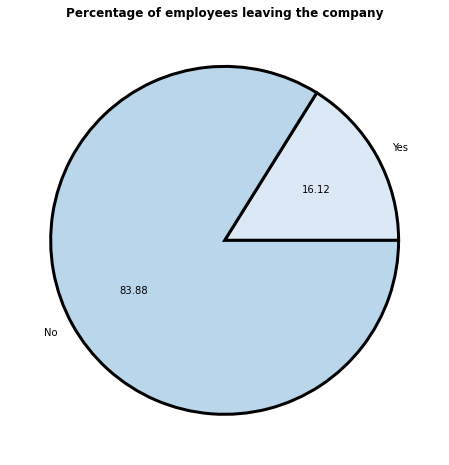

In [9]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of employees leaving the company', fontweight = 'bold')
plt.pie([237, 1233], labels = ['Yes', 'No'], autopct = '%.2f', 
       wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

### A) The percentage of employees leaving the company is 16.12%, the dataset is imbalanced and we need to take that into account to get the most accurate insights.

### Q) How does age affect attrition?

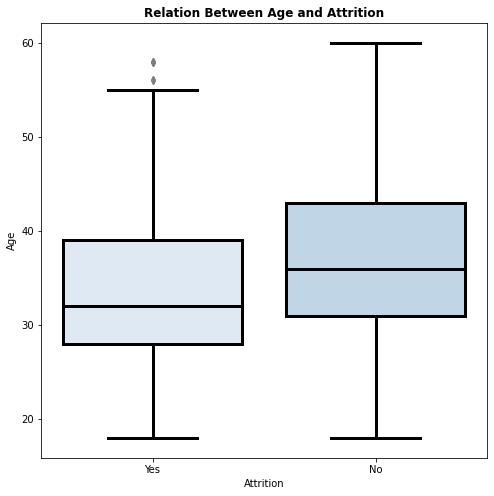

In [10]:
plt.figure(figsize = (8, 8))
plt.title('Relation Between Age and Attrition', fontweight = 'bold')
sns.boxplot(y = 'Age', x = 'Attrition', data = df, linewidth = 3,
            boxprops = {'edgecolor': 'black'},
            medianprops = {'color': 'black'},
            whiskerprops = {'color': 'black'},
            capprops = {'color': 'black'})
plt.show()

### A) It is clear from the above graph that younger people are more likely to leave the company, it may be because they might start looking for better roles or higher salaries as they become more experieced.

### Q) What is the effect of monthly income on attrition?

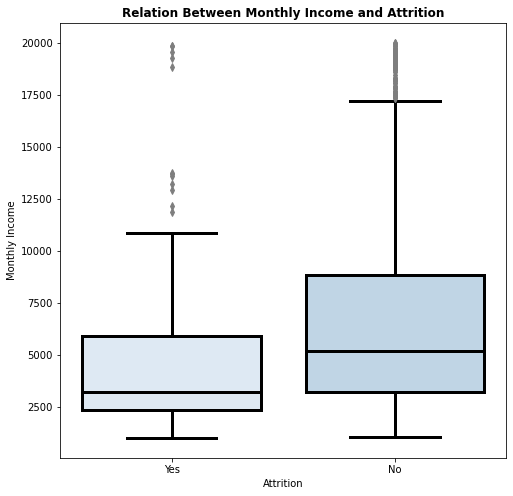

In [52]:
plt.figure(figsize = (8, 8))
plt.title('Relation Between Monthly Income and Attrition', fontweight = 'bold' )
sns.boxplot(y = 'MonthlyIncome', x = 'Attrition', data = df, linewidth = 3,
            boxprops = {'edgecolor': 'black'},
            medianprops = {'color': 'black'},
            whiskerprops = {'color': 'black'},
            capprops = {'color': 'black'})
plt.ylabel('Monthly Income')
plt.show()

### A) People with higher salaries are less likely to leave the company, but there are a considerable number of people leaving the company even though they have a high monthly salary, it may be because higher earning employees are older and have reached the age of retirement, lets look at a graph to confirm our assumption

In [12]:
min_salary_by_age = pd.DataFrame(df.groupby(['Age']).MonthlyIncome.min())

In [13]:
max_salary_by_age = pd.DataFrame(df.groupby(['Age']).MonthlyIncome.max())

In [14]:
avg_salary_by_age = pd.DataFrame(df.groupby(['Age']).MonthlyIncome.mean())

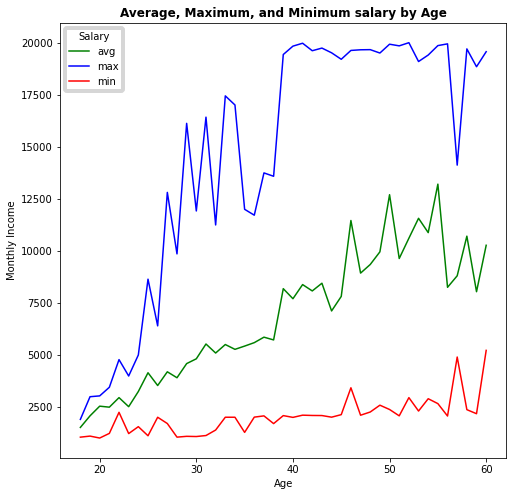

In [15]:
plt.figure(figsize = (8,8))
plt.title('Average, Maximum, and Minimum salary by Age', fontweight = 'bold')
sns.lineplot(x = 'Age', y = 'MonthlyIncome', data = avg_salary_by_age, color = 'green')
sns.lineplot(x = 'Age', y = 'MonthlyIncome', data = max_salary_by_age, color = 'blue')
sns.lineplot(x = 'Age', y = 'MonthlyIncome', data = min_salary_by_age, color = 'red')
plt.legend(['avg', 'max', 'min'], title = 'Salary')
plt.ylabel('Monthly Income')
plt.show()

### As we can see the average, minimum and maximum salaries usually increase with age, in the boxplot we saw that the  outliers who are not leaving the company earn in the range of 17,500 - 20,000, some people in this range are still in their early 40s and some people earning the same amount are in their late 50s and may be retiring.

### Q) How does Gender Affect Attrition?

In [16]:
df[df['Gender'] == 'Male'].Attrition.value_counts()

No     732
Yes    150
Name: Attrition, dtype: int64

In [17]:
df[df['Gender'] == 'Female'].Attrition.value_counts()

No     501
Yes     87
Name: Attrition, dtype: int64

In [18]:
male_attrition = [150, 732]
female_attrition = [87, 501]
labels = ['Yes', 'No']

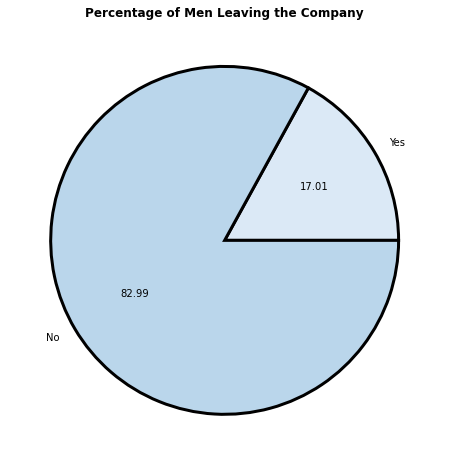

In [19]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of Men Leaving the Company', fontweight = 'bold')
plt.pie(x = np.array(male_attrition), labels = labels, autopct = "%.2f",
        wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

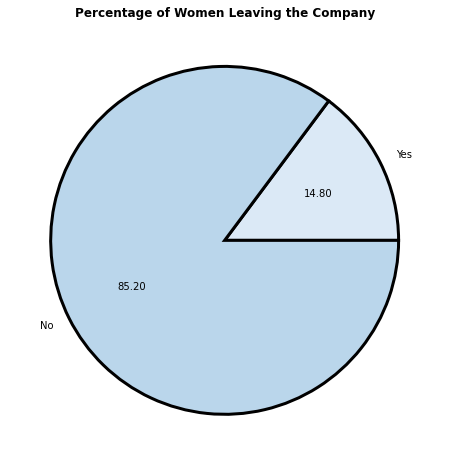

In [20]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of Women Leaving the Company', fontweight = 'bold')
plt.pie(x = np.array(female_attrition), labels = labels, autopct = "%.2f",
        wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

### In the graph we can see that 17% of men and 15% of women leave the company.

### Q) Does the marital status of different genders affect the attrition?

###### First we will look at the relation between attrition and marital status for the female employees of the company.

In [21]:
df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')].MaritalStatus.value_counts()

Single      47
Married     31
Divorced     9
Name: MaritalStatus, dtype: int64

In [22]:
df[(df['Gender'] == 'Female') & (df['Attrition'] == 'No')].MaritalStatus.value_counts()

Married     241
Single      152
Divorced    108
Name: MaritalStatus, dtype: int64

###### From the above data we will make pie charts to visualize the attrition for women with different marital status.

In [23]:
single_female_data = [47, 152]
married_female_data = [31, 241]
divorced_female_data = [9, 108]

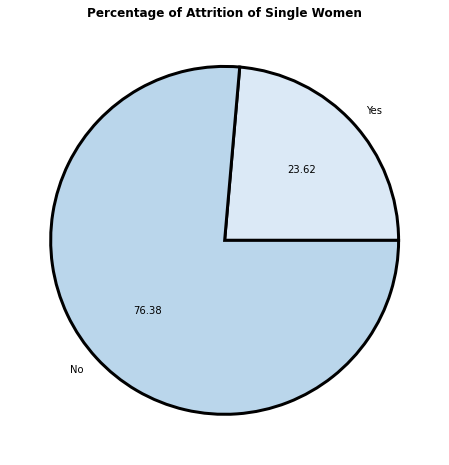

In [24]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of Attrition of Single Women', fontweight = 'bold')
plt.pie(single_female_data, labels = labels, autopct = '%.2f',
       wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

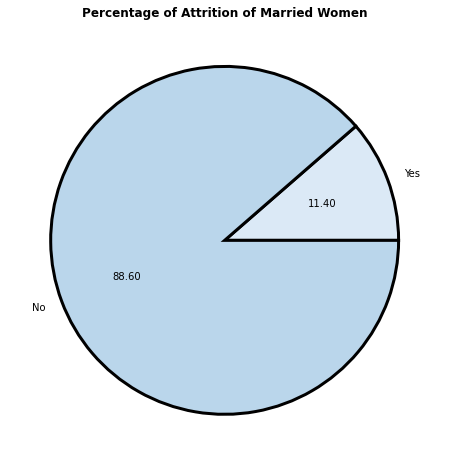

In [25]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of Attrition of Married Women', fontweight = 'bold')
plt.pie(married_female_data, labels = labels, autopct = '%.2f',
       wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

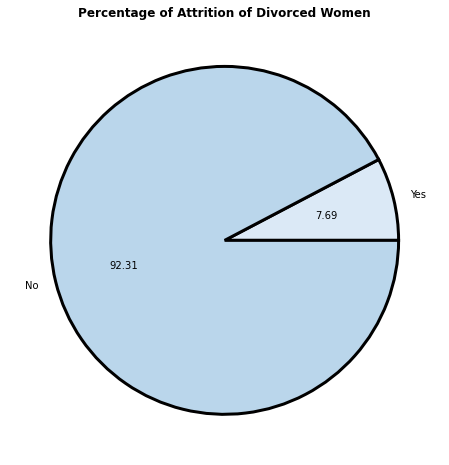

In [26]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of Attrition of Divorced Women', fontweight = 'bold')
plt.pie(divorced_female_data, labels = labels, autopct = '%.2f',
       wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

###### The above pie charts show that attrition is highest for single women, and lowest for married women.

###### Lets perform the same steps to look at the attrition rate for male employees based on their marital status.

In [27]:
df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes')].MaritalStatus.value_counts()

Single      73
Married     53
Divorced    24
Name: MaritalStatus, dtype: int64

In [28]:
df[(df['Gender'] == 'Male') & (df['Attrition'] == 'No')].MaritalStatus.value_counts()

Married     348
Single      198
Divorced    186
Name: MaritalStatus, dtype: int64

In [29]:
single_male_data = [73, 198]
married_male_data = [53, 348]
divorced_male_data = [24, 186]
label = ['Yes', 'No']

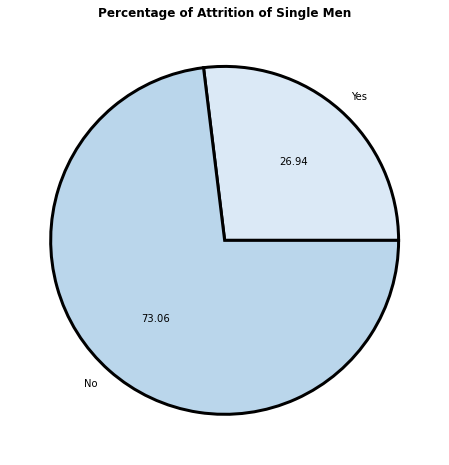

In [30]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of Attrition of Single Men', fontweight = 'bold')
plt.pie(single_male_data, labels = labels, autopct = '%.2f',
       wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

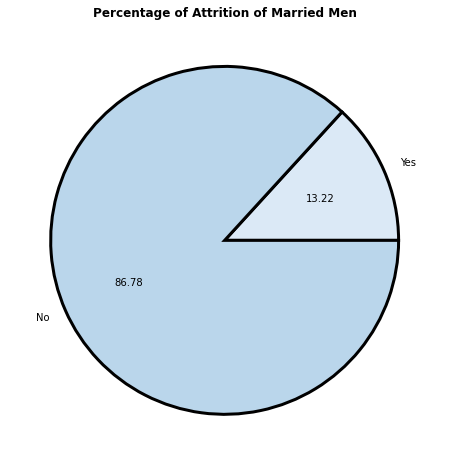

In [31]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of Attrition of Married Men', fontweight = 'bold')
plt.pie(married_male_data, labels = labels, autopct = '%.2f',
       wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

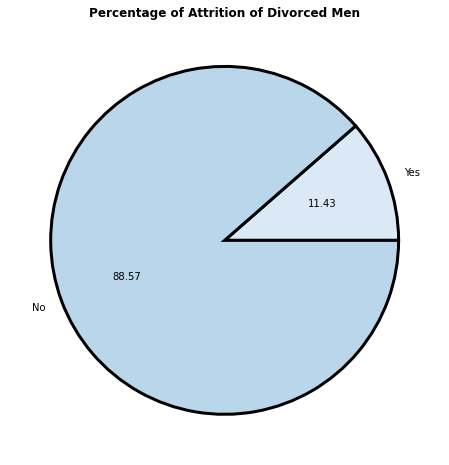

In [32]:
plt.figure(figsize = (8, 8))
plt.title('Percentage of Attrition of Divorced Men', fontweight = 'bold')
plt.pie(divorced_male_data, labels = labels, autopct = '%.2f',
       wedgeprops = {'linewidth': 3, 'edgecolor': 'black'})
plt.show()

###### The above pie charts shows that attrition is highest for single men, and lowest for divorced men.

### A) Irrespective of the gender, we see that single people have to highest chance of attrition, it may be because single people are usually younger and also they can relocate more easily for a better job. We also see that the attrition for men is higher than women across all three marital status.

### Lets look at a graph to confirm to confirm the assumption about the age of single people.

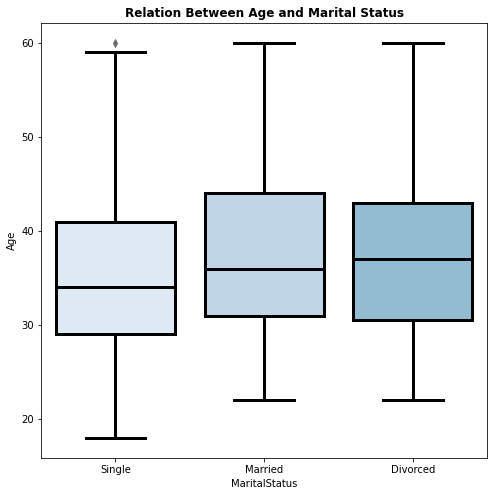

In [33]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'MaritalStatus', y = 'Age', data = df, linewidth = 3,
            boxprops = {'edgecolor': 'black'},
            medianprops = {'color': 'black'},
            whiskerprops = {'color': 'black'},
            capprops = {'color': 'black'})
plt.title('Relation Between Age and Marital Status', fontweight = 'bold')
plt.show()

### The graph shows that the median age is the lowest for single people therefore the assumption made in the above statement is correct.

### Q) How does the salary hike affect attrition?

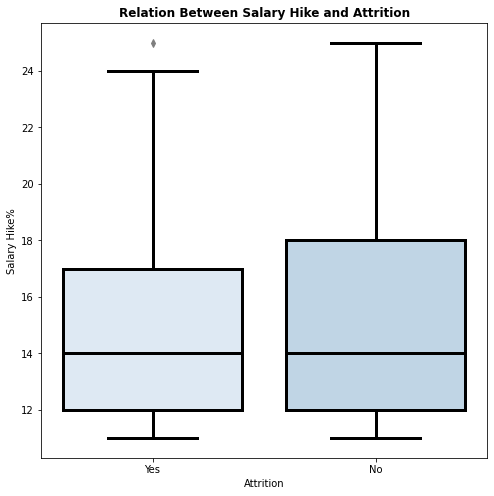

In [34]:
plt.figure(figsize = (8, 8))
plt.title('Relation Between Salary Hike and Attrition', fontweight = 'bold')
sns.boxplot(x = 'Attrition', y = 'PercentSalaryHike', data = df, linewidth = 3,
            boxprops = {'edgecolor': 'black'},
            medianprops = {'color': 'black'},
            whiskerprops = {'color': 'black'},
            capprops = {'color': 'black'})
plt.ylabel('Salary Hike%')
plt.show()

### A) Salary hike range is similar irrespective of attrition therefore it does not help us in determining attrition.

### Q) How does enviroment satisfaction effect attrition?

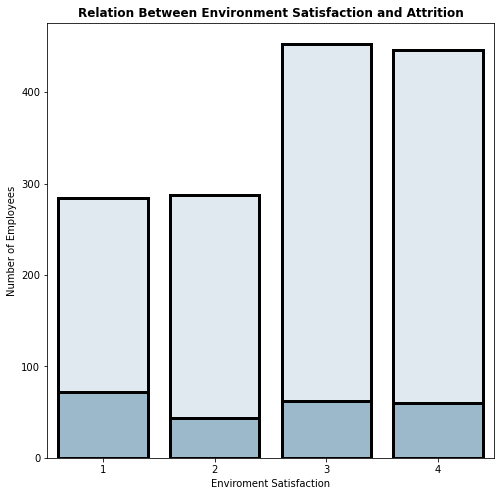

In [35]:
plt.figure(figsize = (8, 8))
plt.title('Relation Between Environment Satisfaction and Attrition', fontweight = 'bold')
sns.countplot(x = 'EnvironmentSatisfaction', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3')
sns.countplot(x = 'EnvironmentSatisfaction', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'black', color = '#93bbd2')
plt.xlabel('Enviroment Satisfaction')
plt.ylabel('Number of Employees')
plt.show()

### A) In the above graph the lighter bars represent the total number of employees for each environment satisfaction rating and the darker bars represent the number of people leaving the company. 25% of the people with the lowest environment satisfaction leave the company, the attrition percentage for the other three ratings is almost half of that.

### Q) How does work life balance affect attrition?

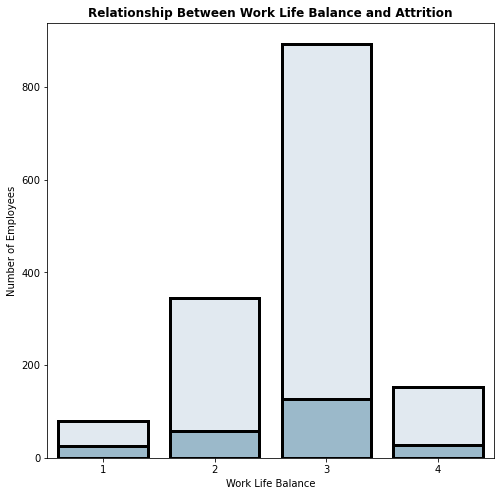

In [36]:
plt.figure(figsize = (8, 8))
plt.title('Relationship Between Work Life Balance and Attrition', fontweight = 'bold')
sns.countplot(x = 'WorkLifeBalance', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3')
sns.countplot(x = 'WorkLifeBalance', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'Black', color = '#93bbd2')
plt.xlabel('Work Life Balance')
plt.ylabel('Number of Employees')
plt.show()

### A) In the above graph the lighter bars represent the total number of employees for each work life balance rating and the darker bars represent the number of people leaving the company, we can see that people with a good work life balance are much less likely to leave the company, nearly a third of the people with the lowest work life balance rating leave the company, they may leave to look for a job with lower work load and more personal time.

### Q) How does education affect attrition

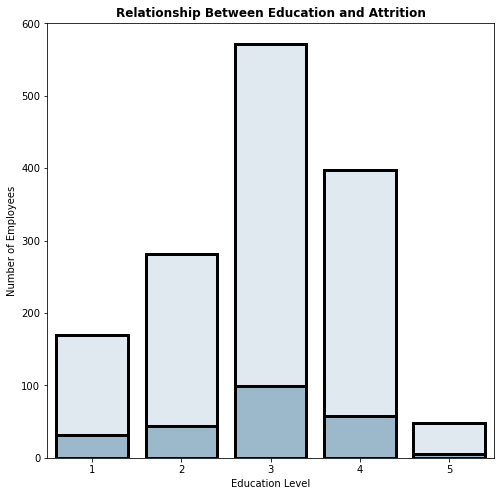

In [37]:
plt.figure(figsize = (8, 8))
plt.title('Relationship Between Education and Attrition', fontweight = 'bold')
sns.countplot(x = 'Education', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3')
sns.countplot(x = 'Education', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'black', color = '#93bbd2')
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.show()

### A) People with a 'below college' education have the highest attrition percentage followed by the people with a Bachelor's degree, people with a doctorate degree have the lowest attrition percentage.

### Q) What is the difference in attrition of different departments?

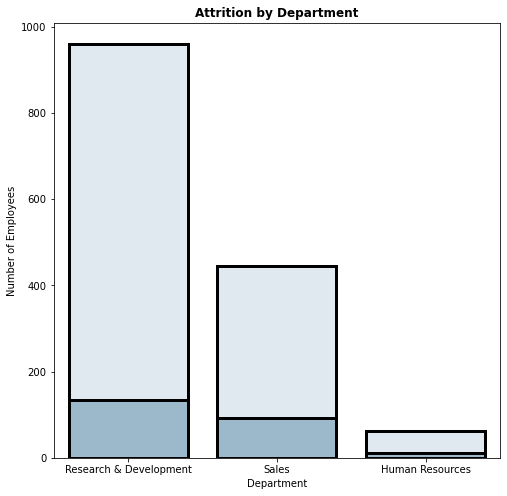

In [38]:
department_order = ['Research & Development', 'Sales', 'Human Resources']
plt.figure(figsize = (8, 8))
plt.title('Attrition by Department', fontweight = 'bold')
sns.countplot(x = 'Department', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3', order = department_order)
sns.countplot(x = 'Department', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'black', color = '#93bbd2', order = department_order)
plt.ylabel('Number of Employees')
plt.show()

### In the above graph it is clear that sales department has the highest attrition, but there is some confusion about the other two departments so lets clear that by looking at the exact numbers.

In [39]:
(df[df.Attrition == 'Yes'].Department.value_counts()/df.Department.value_counts())*100

Research & Development    13.839750
Sales                     20.627803
Human Resources           19.047619
Name: Department, dtype: float64

### A) The Sales department has 20.6% attrition followed by the Human Resources department which has 19.0% attrition and the Research & Development department has 13.8% attrition.

### Q) How does overtime affect attrition?

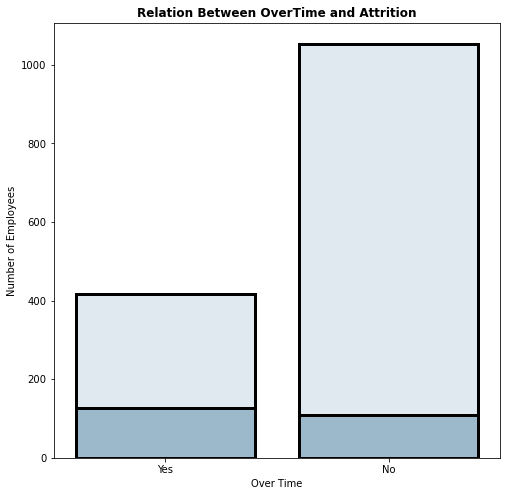

In [40]:
overtime_order = ['Yes', 'No']
plt.figure(figsize = (8, 8))
sns.countplot(x = 'OverTime', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3', order = overtime_order)
sns.countplot(x = 'OverTime', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'black', color = '#93bbd2', order = overtime_order)
plt.title('Relation Between OverTime and Attrition', fontweight = 'bold')
plt.xlabel('Over Time')
plt.ylabel('Number of Employees')
plt.show()

### A) Working over time has a significant affect on attrition as we can see in the above graph nearly a third of the employees working overtime leave the company, it may be because the are unhappy with their work life balance.

### Q) Does the employee's performance rating affect attrition?

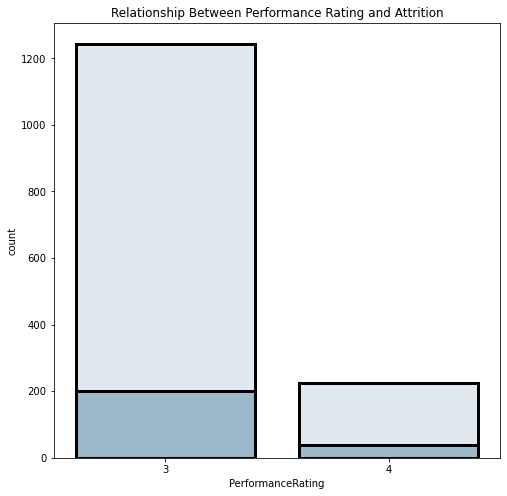

In [41]:
plt.figure(figsize = (8, 8))
plt.title('Relationship Between Performance Rating and Attrition')
sns.countplot(x = 'PerformanceRating', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3')
sns.countplot(x = 'PerformanceRating', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'black', color = '#93bbd2')
plt.show()

### From the graph it seems like the attrition percentage is similar for both the ratings, lets confirm this by looking at the exact number.

In [42]:
(df[df.Attrition == 'Yes'].PerformanceRating.value_counts()/df.PerformanceRating.value_counts())*100

3    16.077170
4    16.371681
Name: PerformanceRating, dtype: float64

### A) The percentage of employees leaving the company for each attrition rating is almost the same, so it does not help us in determining attrition.

### Q) How does job involvement affect attrition?

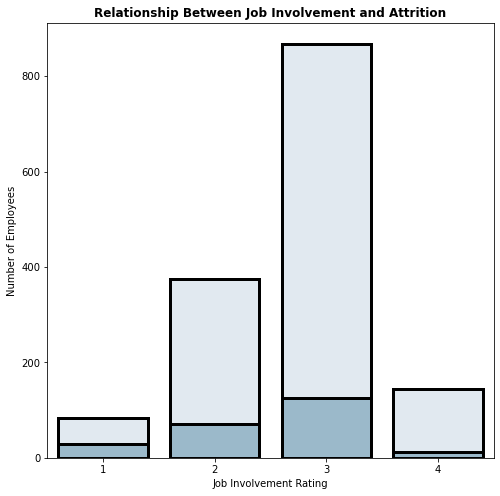

In [43]:
plt.figure(figsize = (8, 8))
plt.title('Relationship Between Job Involvement and Attrition', fontweight = 'bold')
sns.countplot(x = 'JobInvolvement', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3')
sns.countplot(x = 'JobInvolvement', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'black', color = '#93bbd2')
plt.xlabel('Job Involvement Rating')
plt.ylabel('Number of Employees')
plt.show()

### A) As the job involvement increases the attrition percentage decreases, about a third of the people with the lowest job involvement rating leave the company, they may leave the company to look for a job with more learning oppurtunities and growth potential.

### Q) Does the commute distance have an affect on attrition?

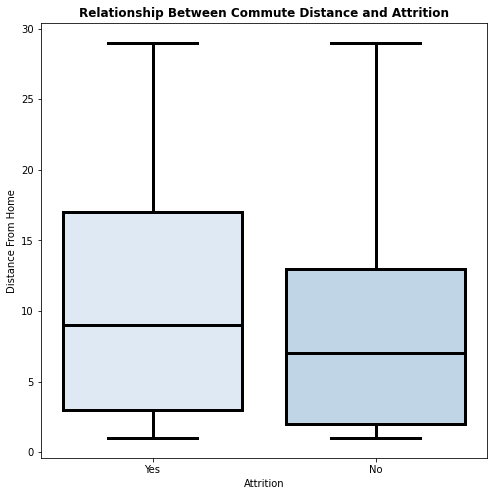

In [44]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Attrition', y = 'DistanceFromHome', data = df, linewidth = 3,
            boxprops = {'edgecolor': 'black'},
            medianprops = {'color': 'black'},
            whiskerprops = {'color': 'black'},
            capprops = {'color': 'black'} )
plt.title('Relationship Between Commute Distance and Attrition', fontweight = 'bold')
plt.ylabel('Distance From Home')
plt.show()

### A) People who have to travel longer distances are more likely to leave the company, they may be looking for a job nearer to their home so they have to spend less time travelling.

### Q) How does business travel frequency affect attrition?

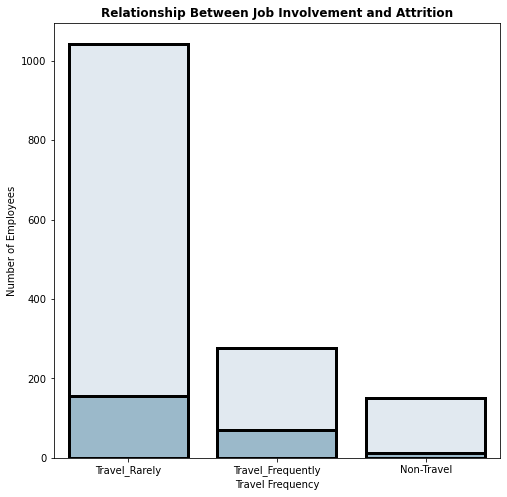

In [45]:
plt.figure(figsize = (8, 8))
plt.title('Relationship Between Job Involvement and Attrition', fontweight = 'bold')
sns.countplot(x = 'BusinessTravel', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3')
sns.countplot(x = 'BusinessTravel', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'black', color = '#93bbd2')
plt.xlabel('Travel Frequency')
plt.ylabel('Number of Employees')
plt.show()

### A) As the travel frequency increases the attrition percentage increases, nearly 25% of the employees who travel frequently leave the company.

### Q) Does the job level affect attrition?

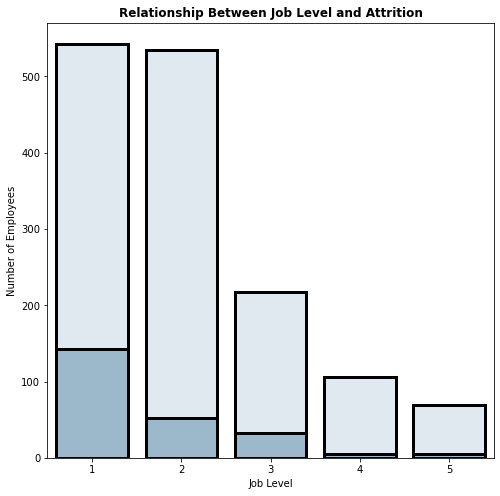

In [46]:
plt.figure(figsize = (8, 8))
plt.title('Relationship Between Job Level and Attrition', fontweight = 'bold')
sns.countplot(x = 'JobLevel', data = df, lw = 3, edgecolor = 'black', color = '#dee9f3')
sns.countplot(x = 'JobLevel', data = df[df.Attrition == 'Yes'], lw = 3, edgecolor = 'black', color = '#93bbd2')
plt.xlabel('Job Level')
plt.ylabel('Number of Employees')
plt.show()

### A) About 25% of the employees with the lowest job level leave the company and the Attrition for higher level jobs is veery low.

### Q) How does job role affect attrition

In [65]:
job_role_attrition = pd.DataFrame((df[df.Attrition == 'Yes'].JobRole.value_counts()/df.JobRole.value_counts())*100)
job_role_attrition.index.names = ['Job Role']
job_role_attrition.columns = ['Attrition Percentage']
job_role_attrition.sort_values(by = ['Attrition Percentage'], ascending = False, inplace = True)

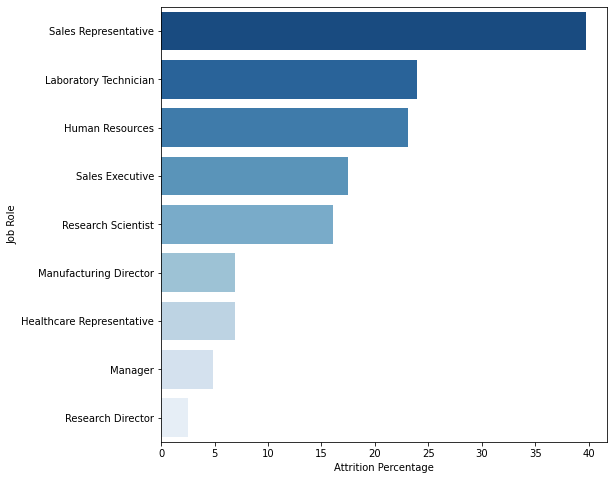

In [48]:
plt.figure(figsize = (8, 8))
sns.barplot(y = job_role_attrition.index, x = job_role_attrition['Attrition Percentage'], palette = 'Blues_r')
plt.show()

### A) Nearly 40% of the sales representatives leave the company,  also 23% of the laboratory technicians and the human resources employees leave the company. Research directors, managers, healthcare represetatives and manufacturing directors have very low attrition. This difference might be caused by the monthly income of employees jobs with higher attrition, lets see if our assumption is true. 

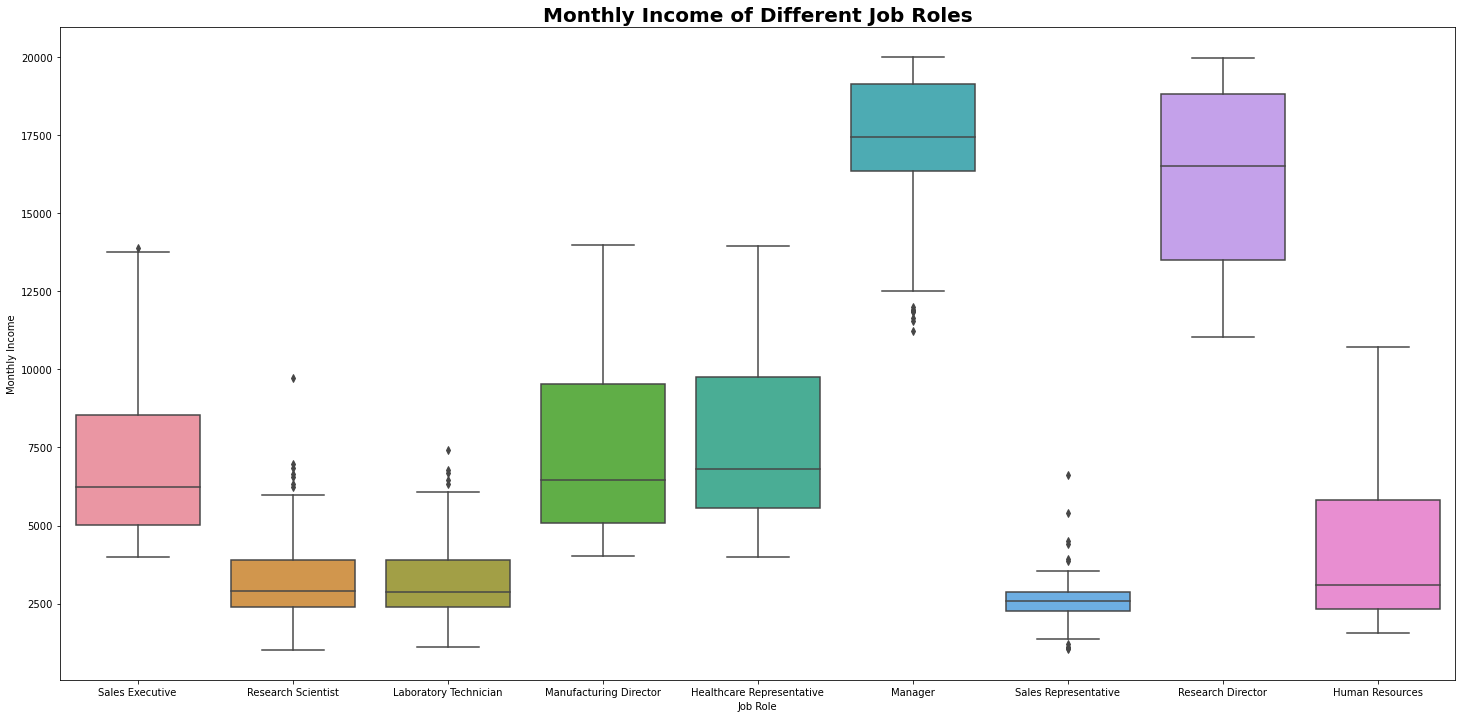

In [49]:
plt.figure(figsize = (25, 12))
plt.title('Monthly Income of Different Job Roles', size = 20, fontweight = 'bold')
sns.boxplot(x = 'JobRole', y = 'MonthlyIncome', data = df)
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.show()

# Key Conclusions 

###### After performing exploratory data analysis the following relations have been observed.

###### 1) Younger people have a higher chance of leaving the company.

###### 2) Employees with a lower monthly income have a higher chance of leaving.

###### 3) Men have 2% more attrition than women.

###### 4) Single people are more likely to leave the company compared to married and divorced people.

###### 5) Nearly 25% of employees with the lowest environment satisfaction rating leave the company.

###### 6) Poor Work life balance leads to higher attrition

###### 7) Nearly a third of the employees working overtime leave the company.

###### 8) About 25% of employees who have to travel frequently because of work leave the company.

###### 9) Employees who live farther away are more likely to leave the company.

###### 10) As the job level increases the attrition percentage decreases.

###### 11) Employees who feel more involved in their jobs are less likely to leave the company.

###### 12) About 40% of sales representatives leave the company, which is almost double of the department with 2nd highest attrition.

# Possible ways to reduce attrition

###### 1) Improve the working environment.

###### 2) Make sure that employees don't have to work overtime.

###### 3) Divide work in such a way that all employees feel involved in their jobs and have a good work life balance.

###### 4) Divide the responsibilty of business travel more fairly so that some employees are not forced to travel alot.

# Prepare Data for Model Fitting and Testing

###### First lets identify the columns which we have to encode.

In [50]:
le_columns = ['Gender', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18']
oe_columns = ['Attrition',  'OverTime', 'BusinessTravel']

In [51]:
oe = OrdinalEncoder(categories = [['No', 'Yes'], ['No', 'Yes'], ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])

In [52]:
df[oe_columns] = oe.fit_transform(df[oe_columns])

In [53]:
le = LabelEncoder()

In [54]:
for col in le_columns:
    df[col] = le.fit_transform(df[col])

###### Now, lets scale the data to improve the model accuracy.

In [55]:
scaler = MinMaxScaler()

In [56]:
cols = df.columns
df = pd.DataFrame(scaler.fit_transform(df))
df.columns = cols

###### Based on the conclusions above, we will train the model based on the following factors.

In [57]:
selected_columns = [
                    'Age',
                    'MonthlyIncome',
                    'MaritalStatus',
                    'EnvironmentSatisfaction',
                    'Department',
                    'OverTime',
                    'DistanceFromHome',
                    'JobLevel',
                    'JobRole',
                    'JobInvolvement',
                    'JobSatisfaction',
                    'Gender',
                    'MonthlyRate',
                    'BusinessTravel',
                    'NumCompaniesWorked', 
                   ]
X = df[selected_columns]
y = df.Attrition

In [58]:
def score(X, y):
    xgb = XGBClassifier(n_estimators = 1000, learning_rate = 0.01, verbosity = 0, random_state = 42)
    xgb.fit(X, y)
    cv_score = cross_val_score(xgb, X, y).mean()
    return cv_score

In [59]:
cv_score = score(X, y)
print(f"cross val score = {cv_score}")

cross val score = 0.8680272108843538


### After performing exploratory data analysis and feature selection we have managed to make a machine learning model which is 87% accurate.